# 2. K-Means Analysis - left=0

In [1]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.collections import PathCollection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Choice of attributes

In [5]:
df_01_scaled = pd.read_csv('../../data/HR_comma_sep_01_scaled.csv', index_col=0)
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
# select employee with  left = 0
train_data = df_01_scaled[df_01_scaled["left"] == 0][numerical_features].values

## Kmeans

### choice of best value of k

In [6]:
# choice of best value of  K that minimizes the sum of squared error
sse_list = list([0] * 49)
silhouette_list = list([0] * 49)
max_k = 50

for k in range(2, max_k + 1):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, n_jobs=-1)
    kmeans.fit(train_data)
    sse_list[k-2] = kmeans.inertia_
    silhouette_list[k-2] = silhouette_score(train_data, kmeans.labels_) 

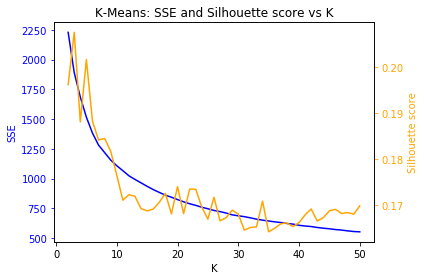

In [7]:
# plot SSE and silhouette on the same scale
# first axis
fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k+1), sse_list, 'b')
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color='b')
ax1.tick_params('y', colors='b')
# second axis
ax2 = ax1.twinx()
ax2.plot(range(2, max_k+1), silhouette_list, 'orange')
ax2.set_ylabel('Silhouette score', color='orange')
ax2.tick_params('y', colors='orange')

plt.title('K-Means: SSE and Silhouette score vs K')
fig.tight_layout()
plt.savefig('../../images/sse_silhouette_vs_k-left=0.png')
plt.show()
# a way to chose the best k is to look at the 'elbow point' that is the point where the sse drops significantly.

In [8]:
print 'max silhouette:', np.max(silhouette_list), 'arg:', np.argmax(silhouette_list), 'k:', np.argmax(silhouette_list)+2
print 'min silhouette:', np.min(silhouette_list), 'arg:', np.argmin(silhouette_list), 'k:', np.argmin(silhouette_list)+2
print 'max sse:', np.max(sse_list), 'arg:', np.argmax(sse_list), 'k:', np.argmax(sse_list)+2
print 'min sse:', np.min(sse_list), 'arg:', np.argmin(sse_list), 'k:', np.argmin(sse_list)+2

diffs = [0] * len(sse_list)
max_sse = np.max(sse_list)
for i in range(1, len(sse_list)-2):
    diffs[i] = abs(sse_list[i] - sse_list[i-1])  # diffs[1] is the difference in SSE between k=3 and k=2

print 'max sse diffs:', np.max(diffs), 'arg:', np.argmax(diffs), 'sse:', sse_list[np.argmax(diffs)], 'silhouette:', silhouette_list[np.argmax(diffs)]
print 'min sse diffs:', np.min(diffs), 'arg:', np.argmin(diffs), 'sse:', sse_list[np.argmin(diffs)], 'silhouette:', silhouette_list[np.argmin(diffs)]
n = 10
top_diffs_args = (-np.array(diffs)).argsort()[:n]
top_silho_args = (-np.array(silhouette_list)).argsort()[:n]
print 'top', n, 'diffs args:', top_diffs_args, '--> k:', top_diffs_args + 2  # add +2 to get corresponding k
print 'top', n, 'silhouette args:', top_silho_args, '--> k:', top_silho_args + 2

max silhouette: 0.207533873202 arg: 1 k: 3
min silhouette: 0.164176466703 arg: 33 k: 35
max sse: 2228.74294636 arg: 0 k: 2
min sse: 552.009683683 arg: 48 k: 50
max sse diffs: 338.714077202 arg: 1 sse: 1890.02886915 silhouette: 0.207533873202
min sse diffs: 0.0 arg: 0 sse: 2228.74294636 silhouette: 0.196185006822
top 10 diffs args: [ 1  2  3  4  5  6  7  8 10  9] --> k: [ 3  4  5  6  7  8  9 10 12 11]
top 10 silhouette args: [ 1  3  0  4  2  6  5  7  8 18] --> k: [ 3  5  2  6  4  8  7  9 10 20]


diffs: [0, 338.71407720186289, 204.54818506534821, 169.75775845909084, 133.476421371784, 101.01963942221892, 62.934283079538318, 62.760957978080796, 47.71083641315181, 41.741730710250977, 42.993726717715731, 30.771792370948219, 28.536722621655485, 29.500522771528153, 26.899785564511262, 23.971013280565899, 23.16308506752739, 17.369724514568134, 19.659438487326724, 18.852897657012477, 16.168533695005863, 13.776305605464358, 15.802915980930948, 12.702823113239788, 13.946643584541903, 10.0155992448191, 11.900123000169629, 15.39297203120816, 7.9418580230866382, 7.1886008660326297, 9.9394926207397702, 11.289768720906864, 7.9545934737986954, 7.5626302096225118, 6.9024061103183385, 5.5868566659307817, 8.4462448908924443, 4.8480786278547612, 10.124831074379244, 5.9005686426510238, 4.55524797523492, 7.741824831589156, 6.0989431189897232, 4.9241054727917799, 6.4051330330266865, 4.5430738517072768, 6.5198603986314083, 0, 0]


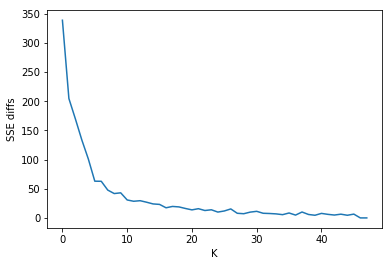

In [9]:
print 'diffs:', diffs

plt.plot(range(len(diffs[1:])), diffs[1:])
plt.ylabel("SSE diffs")
plt.xlabel("K")
plt.show()

In [10]:
chosen_k = 8
print 'elbow point: (k= %d, sse = %f, silhouette = %f)' % (chosen_k, sse_list[chosen_k-2],  silhouette_list[chosen_k-2])

elbow point: (k= 8, sse = 1218.292582, silhouette = 0.184471)


In [11]:
# analysis of the k centroids for a chosen k
kmeans = KMeans(n_clusters=chosen_k)
kmeans.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
# 2D PCA highlighting the clusters
pca = PCA(n_components=2)
X_scaled_2D = pca.fit_transform(train_data)

In [13]:
# plot PCA
# color_list = plt.cm.Set3(np.linspace(0, 1, 12)) (Set3, tab20)
colors = cm.rainbow(np.linspace(0, 1, chosen_k))
labels = [PathCollection] * len(colors)
for i in range(0, X_scaled_2D.shape[0]):
    x, y = X_scaled_2D[i, 0], X_scaled_2D[i, 1]
    label_i = kmeans.labels_[i]
    c = colors[label_i]
    labels[label_i] = plt.scatter(x, y, c=colors[label_i], alpha=0.5)
 

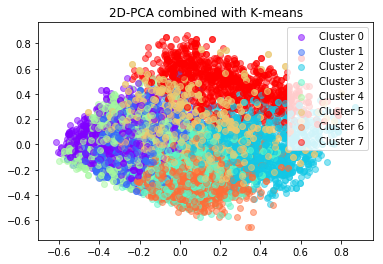

In [14]:
plt.legend([l for l in labels], ['Cluster %d' % i for i in range(0, len(labels))])    
plt.title('2D-PCA combined with K-means')
plt.savefig('../../images/pca_kmeans-left=0.png')
plt.show()

## Analysis of k centroids

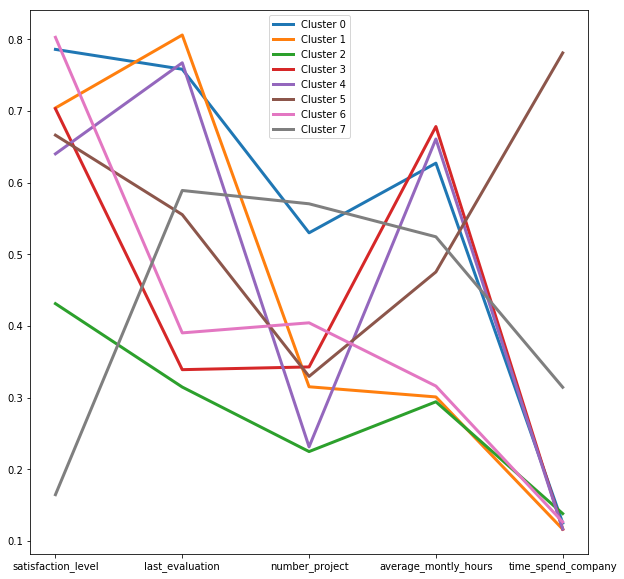

In [15]:
plt.figure(1, figsize=(10, 10))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(range(0, train_data.shape[1]), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
plt.xticks(range(0, train_data.shape[1]), list(df_01_scaled.columns))
plt.legend()
plt.savefig('../../images/k-centroids_analysis-left=0.png')
plt.show()


### compare distributions of features within clusters (and the entire dataset)

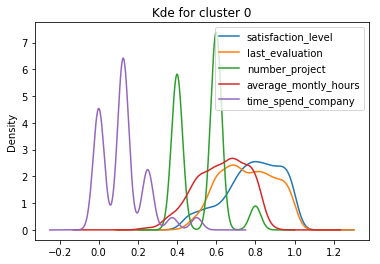

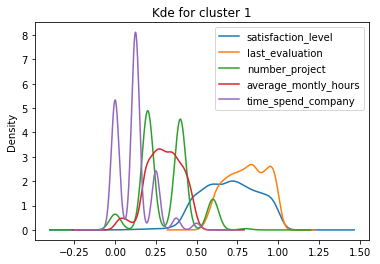

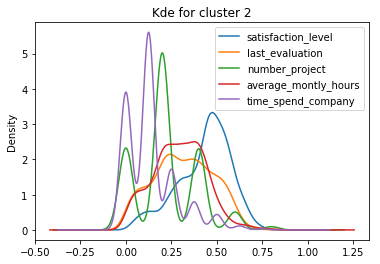

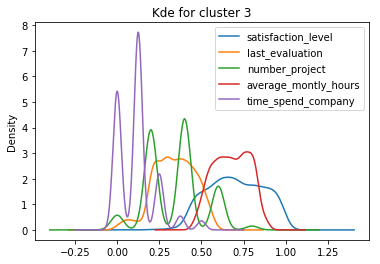

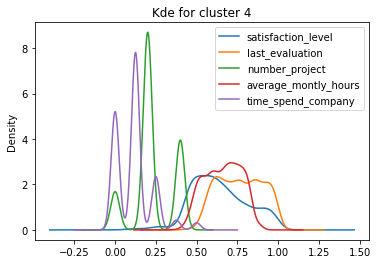

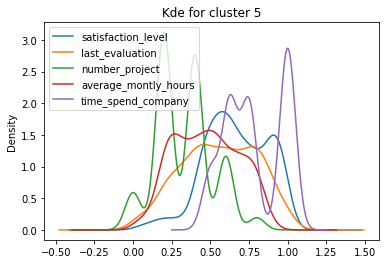

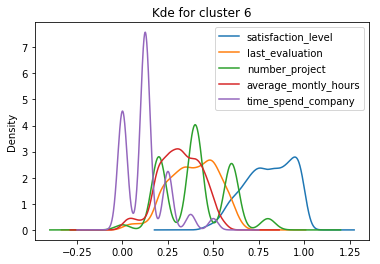

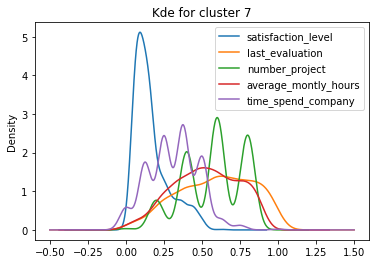

In [16]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'][:len(numerical_features)]
df_cluster = pd.DataFrame(train_data, columns=numerical_features)
df_cluster['cluster'] = kmeans.labels_
alpha = 1
for i in range(chosen_k):
    cluster_i = df_cluster[df_cluster['cluster'] == i][numerical_features]
    for col in cluster_i:
        cluster_i[col].plot(kind='kde')
    plt.title('Kde for cluster %d' % i)
    plt.legend()
    plt.savefig('../../images/kde_within_clusters_c' + str(i) + '-left=0.png')
    plt.show()
    
# TODO: evaluate numerically, too many clusters

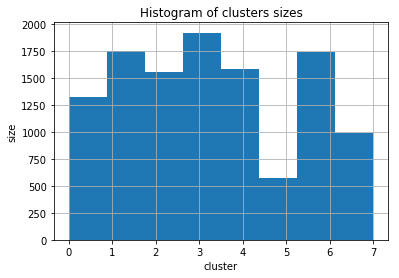

In [17]:
# cluster's size histogram
df_cluster['cluster'].hist(bins=chosen_k)
plt.xlabel('cluster')
plt.ylabel('size')
plt.title('Histogram of clusters sizes')
plt.savefig('../../images/kmeans_cluster_size_hist-left=0.png')
plt.show()